In [2]:
# Step 2: Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt

# Read population data (skip metadata rows)
pop_df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv', skiprows=4)

# Read metadata to get regions/income groups
meta_df = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv')

# Merge population and metadata on 'Country Code'
df = pd.merge(pop_df, meta_df[['Country Code', 'Region', 'IncomeGroup']], on='Country Code')

# Drop rows with missing 2022 data
df = df[['Country Name', '2022', 'Region', 'IncomeGroup']].dropna()


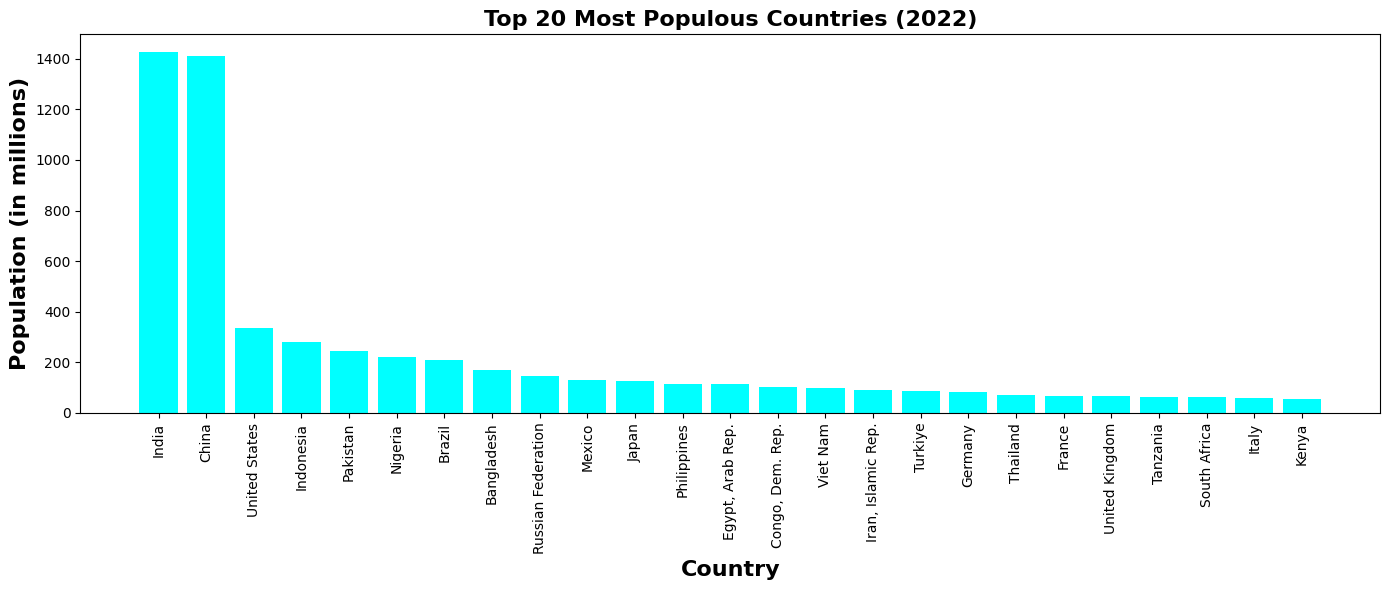

In [3]:
# Step 3: Bar Chart - Top 20 Most Populous Countries (2022)
top20 = df.sort_values(by='2022', ascending=False).head(25)

plt.figure(figsize=(14, 6))
plt.bar(top20['Country Name'], top20['2022'] / 1e6, color='aqua')
plt.title('Top 20 Most Populous Countries (2022)', fontsize=16  , weight='bold')
plt.xlabel('Country', weight='bold' , fontsize=16)
plt.ylabel('Population (in millions)' , weight='bold' , fontsize=16)
plt.tight_layout(pad=2)  # add more space around the chart
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

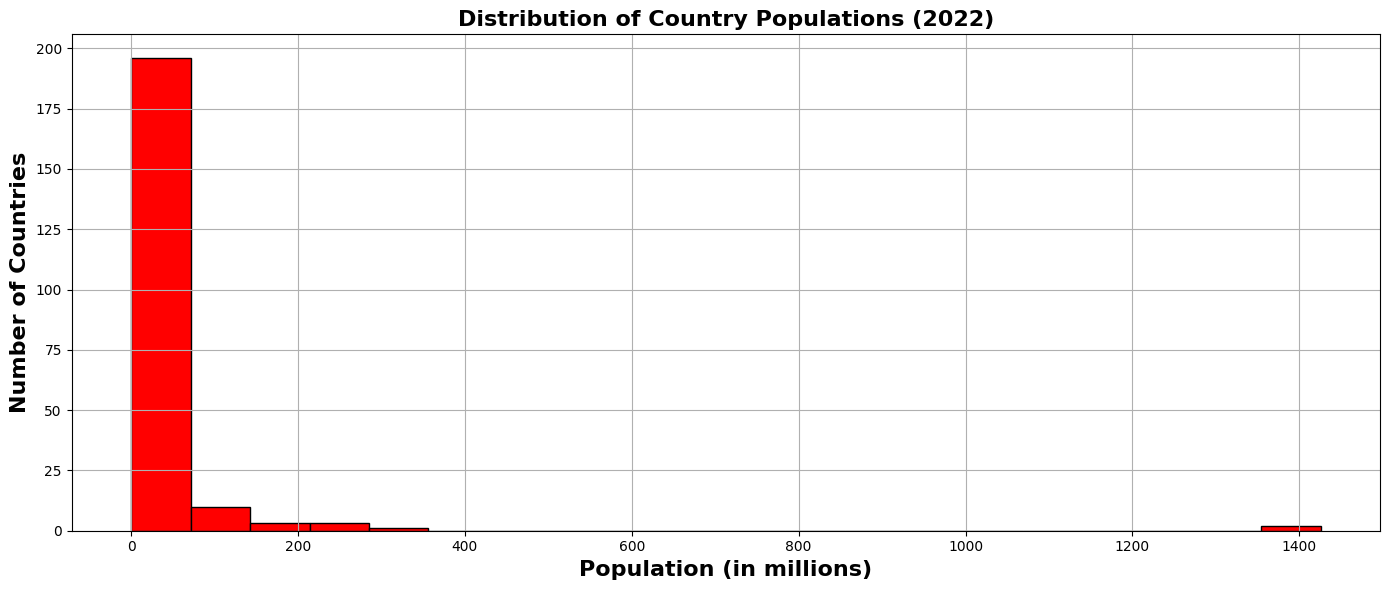

In [4]:
# Step 4: Histogram - Population Distribution Across Countries
plt.figure(figsize=(14, 6))
plt.hist(df['2022'] / 1e6, bins=20, color='red', edgecolor='black')
plt.title('Distribution of Country Populations (2022)', fontsize=16 , weight='bold')
plt.xlabel('Population (in millions)' , fontsize=16 , weight='bold')
plt.ylabel('Number of Countries' , fontsize=16 , weight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()


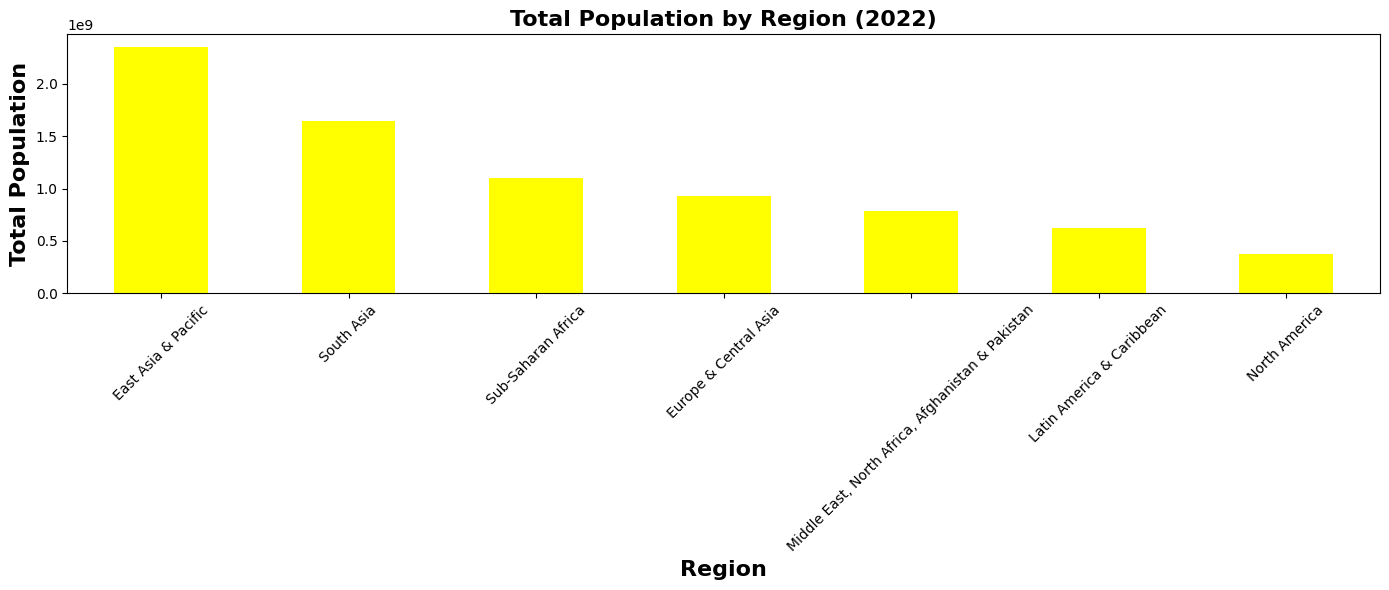

In [5]:
# Step 5: Total Population by Region (2022)
region_pop = df.groupby('Region')['2022'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
region_pop.plot(kind='bar', color='yellow')
plt.title('Total Population by Region (2022)', fontsize=16 , weight='bold')
plt.ylabel('Total Population' , fontsize=16 , weight='bold')
plt.xlabel('Region' , fontsize=16 , weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
